In [27]:
import pandas as pd
import numpy as np


df = pd.read_csv(r"C:\Users\ASUS\Dropbox\Downloads\Desktop\FarahPortfolio\Traffic_Incidents.csv", low_memory=False)
print(df.shape)
print(df)


(77084, 5)
          acci_id            acci_time  \
0      7009318011  04/09/2025 20:40:06   
1      7009320204  04/09/2025 20:41:00   
2      7009342870  04/09/2025 20:49:23   
3      7009371478  04/09/2025 21:00:08   
4      7009416206  04/09/2025 21:17:49   
...           ...                  ...   
77079  6085075780  28/11/2024 01:27:32   
77080  6085081101  28/11/2024 01:33:52   
77081  6085090351  28/11/2024 01:47:58   
77082  6085090733  28/11/2024 01:48:33   
77083  6085034510  28/11/2024 00:27:41   

                                               acci_name     acci_x     acci_y  
0                                تعطل مركبة خفيفة - بسيط  25.118610  55.438614  
1                                تعطل مركبة خفيفة - بسيط  25.071551  55.128412  
2                                        صدم حاجز - بليغ  25.118915  55.196518  
3                                        صدم رصيف - بسيط  25.081060  55.136970  
4                                          مركبات مخالفة  25.174510  55.372730 

In [28]:

df["acci_time"] = pd.to_datetime(
    df["acci_time"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)


In [29]:
df = df.dropna(subset=["acci_time"])
df["year"]  = df["acci_time"].dt.year
df["month"] = df["acci_time"].dt.month
df["month_name"] = df["acci_time"].dt.month_name()
df["hour"]  = df["acci_time"].dt.hour
df["day"]   = df["acci_time"].dt.day_name()
len(df)
df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y,year,month,month_name,hour,day
0,7009318011,2025-09-04 20:40:06,تعطل مركبة خفيفة - بسيط,25.118610,55.438614,2025,9,September,20,Thursday
1,7009320204,2025-09-04 20:41:00,تعطل مركبة خفيفة - بسيط,25.071551,55.128412,2025,9,September,20,Thursday
2,7009342870,2025-09-04 20:49:23,صدم حاجز - بليغ,25.118915,55.196518,2025,9,September,20,Thursday
3,7009371478,2025-09-04 21:00:08,صدم رصيف - بسيط,25.081060,55.136970,2025,9,September,21,Thursday
4,7009416206,2025-09-04 21:17:49,مركبات مخالفة,25.174510,55.372730,2025,9,September,21,Thursday


In [30]:
df["severity"] = df["acci_name"].apply(
    lambda x: x.split("-")[-1].strip() if "-" in x else None
)

df["acci_name"] = df["acci_name"].apply(
    lambda x: x.split("-")[0].strip() if "-" in x else x.strip()
)

df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y,year,month,month_name,hour,day,severity
0,7009318011,2025-09-04 20:40:06,تعطل مركبة خفيفة,25.118610,55.438614,2025,9,September,20,Thursday,بسيط
1,7009320204,2025-09-04 20:41:00,تعطل مركبة خفيفة,25.071551,55.128412,2025,9,September,20,Thursday,بسيط
2,7009342870,2025-09-04 20:49:23,صدم حاجز,25.118915,55.196518,2025,9,September,20,Thursday,بليغ
3,7009371478,2025-09-04 21:00:08,صدم رصيف,25.081060,55.136970,2025,9,September,21,Thursday,بسيط
4,7009416206,2025-09-04 21:17:49,مركبات مخالفة,25.174510,55.372730,2025,9,September,21,Thursday,None


In [31]:
df["severity"] = df["severity"].fillna("غير مصنّف")

In [32]:

df["acci_name"] = df["acci_name"].astype(str).str.strip()

df = df.drop_duplicates(subset=["acci_id"])
len(df)

77081

In [33]:

df.to_csv(r"C:\Users\ASUS\Dropbox\Downloads\Desktop\FarahPortfolio\traffic_clean.csv", index=False)

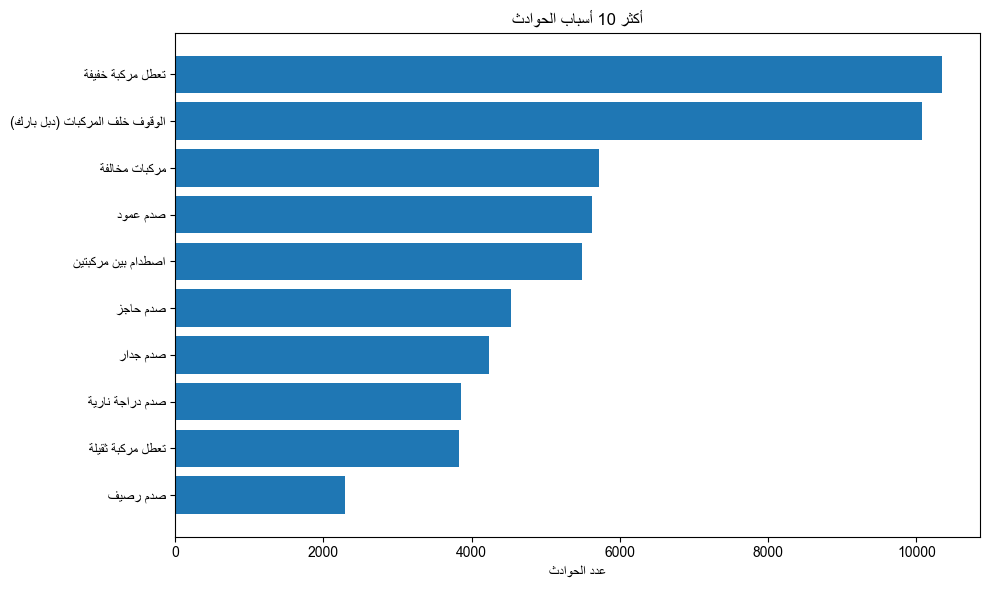

In [34]:

import matplotlib.pyplot as plt
import matplotlib
import arabic_reshaper
from bidi.algorithm import get_display

# Pick an Arabic-capable font 
font_candidates = ["Arial", "Tahoma", "Amiri", "Noto Naskh Arabic", "DejaVu Sans"]
available = {f.name for f in matplotlib.font_manager.fontManager.ttflist}
for f in font_candidates:
    if f in available:
        plt.rcParams["font.family"] = f
        break

plt.rcParams["axes.unicode_minus"] = False  

top_causes = df["acci_name"].value_counts().head(10)

reshaper = arabic_reshaper.ArabicReshaper({"delete_harakat": False})
def ar(s): 
    return get_display(reshaper.reshape(str(s)))

labels = [ar(s) for s in top_causes.index]

# 3) plot
plt.figure(figsize=(10, 6))
plt.barh(labels, top_causes.values)
plt.gca().invert_yaxis()  # most frequent on top
plt.xlabel(ar("عدد الحوادث"))
plt.title(ar("أكثر 10 أسباب الحوادث"))
plt.tight_layout()
plt.savefig(r"C:\Users\ASUS\Dropbox\Downloads\Desktop\FarahPortfolio\top_causes.png", dpi=300)
plt.show()


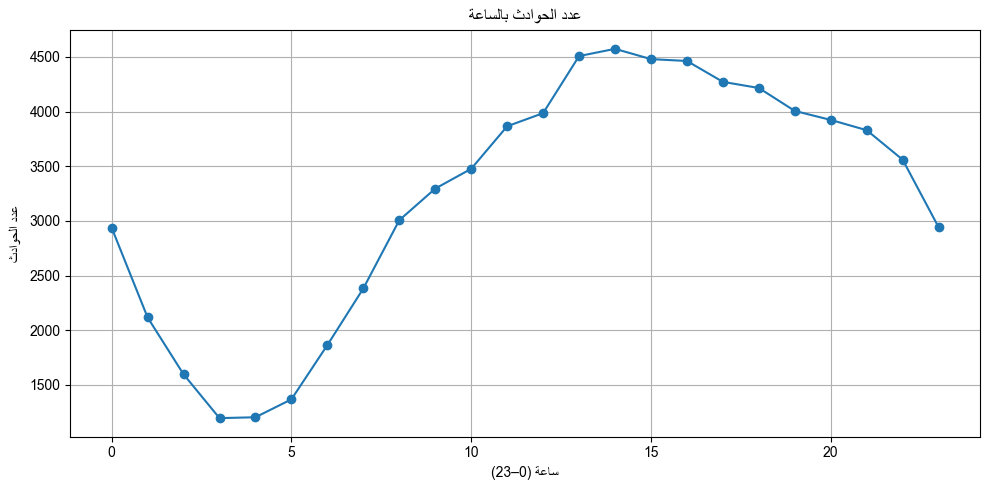

In [35]:
by_hour = df["hour"].value_counts().sort_index()
plt.figure(figsize=(10,5))
by_hour.plot(kind="line", marker="o")
plt.title(ar("عدد الحوادث بالساعة"))
plt.xlabel(ar("ساعة (0–23)"))
plt.ylabel(ar("عدد الحوادث"))
plt.grid(True); 
plt.tight_layout()
plt.savefig(r"C:\Users\ASUS\Dropbox\Downloads\Desktop\FarahPortfolio\incidents_by_hour.png", dpi=300)
plt.show()


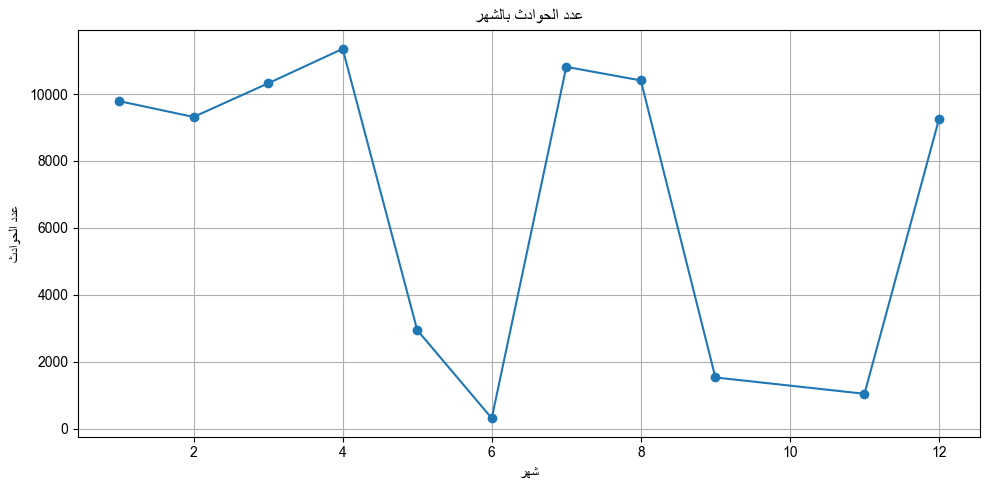

In [36]:
by_month = df["month"].value_counts().sort_index()
plt.figure(figsize=(10,5))
by_month.plot(kind="line", marker="o")
plt.title(ar("عدد الحوادث بالشهر"))
plt.xlabel(ar("شهر"))
plt.ylabel(ar("عدد الحوادث"))
plt.grid(True); 
plt.tight_layout(); 
plt.savefig(r"C:\Users\ASUS\Dropbox\Downloads\Desktop\FarahPortfolio\incidents_by_month.png", dpi=300)
plt.show()


In [37]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[25.2, 55.3], zoom_start=10)

# HeatMap 
sample = df.dropna(subset=["acci_x","acci_y"]).sample(n=min(10000, len(df)), random_state=42)
HeatMap(sample[["acci_x","acci_y"]].values.tolist(), radius=8, blur=6).add_to(m)
m.save(r"C:\Users\ASUS\Dropbox\Downloads\Desktop\FarahPortfolio\dubai_accidents_heatmap.html")


In [38]:
total_incidents = len(df)

morning = df[df["hour"].between(6,9)]
peak_share = round(100 * len(morning) / total_incidents, 1)

cause_counts = df["acci_name"].value_counts()
top1, top2 = cause_counts.index[:2].tolist()
top12_share = round(100 * cause_counts.iloc[:2].sum() / total_incidents, 1)


peak_hour = df["hour"].value_counts().idxmax()
peak_hour_count = df["hour"].value_counts().max()

total_incidents, peak_share, top1, top2, top12_share, peak_hour, peak_hour_count


(77081,
 13.7,
 'تعطل مركبة خفيفة',
 'الوقوف خلف المركبات (دبل بارك)',
 np.float64(26.5),
 np.int32(14),
 np.int64(4574))